In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt


In [2]:
print("Downloading mnist...")
mnist = np.load('mnist.npz')

normalize = lambda X : (2/255)*X - 1

In [3]:
num_train_images = 60000

Xtrain = normalize(mnist['x_train'][:num_train_images])
Ytrain = mnist['y_train'][:num_train_images]

In [4]:
# Creating the digits classifiers using least squares
Xtrain = Xtrain.reshape(num_train_images, -1).astype(np.float64)

# Add in column of ones to A matrix
# Xtrain = np.hstack((np.ones((num_train_images, 1)).astype(np.float64), Xtrain))

Ytrain = Ytrain.reshape(num_train_images, -1).astype(np.float64)

labels = {}

for i in range(0, 10):
    labels[i] = np.copy(Ytrain)
    labels[i][labels[i] != i] = -1
    labels[i][labels[i] == i] = 1

detectors = {}

for i in range(0, 10):
    detectors[i] = np.linalg.lstsq(Xtrain, labels[i])[0]
    # detectors[i] = np.vstack((np.zeros((1,1)).astype(np.float64), detectors[i]))

def determine_digit(image):
    estimates = []

    for i in range(0, 10):
        image = image.reshape(1,-1).astype(np.float64)
        # image = np.hstack((np.ones((1,1)).astype(np.float64), image))
        # print(len(image[0]))

        estimates.append(np.matmul(image, detectors[i]))
    
    return np.argmax(estimates)

C:\Users\aloks\AppData\Local\Temp\ipykernel_840\1231496139.py:19: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  detectors[i] = np.linalg.lstsq(Xtrain, labels[i])[0]


[[-3.18257838e+10]
 [ 2.16547951e+09]
 [ 2.16701319e+09]
 [ 2.16882349e+09]
 [ 2.16525184e+09]
 [ 2.16868528e+09]
 [ 2.16437235e+09]
 [ 2.17001336e+09]
 [ 2.16590649e+09]
 [ 2.17131394e+09]
 [ 2.17101906e+09]
 [ 2.16050892e+09]
 [ 1.52775308e+09]
 [-6.97714006e+08]
 [ 5.39470958e+08]
 [ 2.10032975e+09]
 [-3.09875573e+08]
 [-3.11847139e+08]
 [-3.12571131e+08]
 [-3.13383497e+08]
 [-3.12522344e+08]
 [-3.14017476e+08]
 [-3.13388374e+08]
 [-3.11922087e+08]
 [-3.10827818e+08]
 [-3.11188456e+08]
 [-3.12472922e+08]
 [-3.12777089e+08]
 [-3.13079929e+08]
 [-3.13270761e+08]
 [-3.11502720e+08]
 [-3.13074357e+08]
 [-2.06440842e+00]
 [ 5.35589457e-01]
 [ 6.01803064e-02]
 [ 1.06606781e-01]
 [ 3.18676829e-02]
 [ 1.23232603e-03]
 [ 2.75206566e-02]
 [ 5.81784844e-02]
 [-3.63176465e-02]
 [ 1.36406422e-01]
 [-8.14758539e-02]
 [ 3.08237672e-02]
 [ 1.37805939e-04]
 [ 3.85121107e-02]
 [-3.08968425e-02]
 [ 7.56561756e-03]
 [ 4.28083539e-02]
 [-7.08166361e-02]
 [ 1.18898094e-01]
 [ 1.80664659e-02]
 [-3.1161540

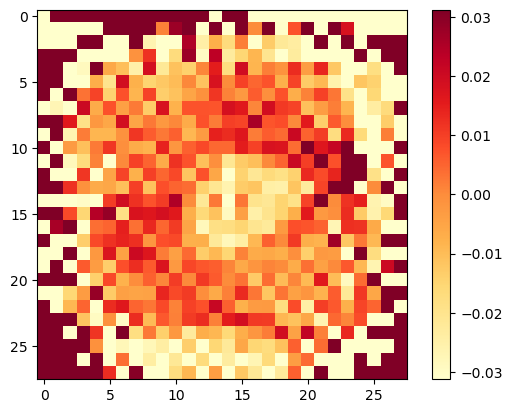

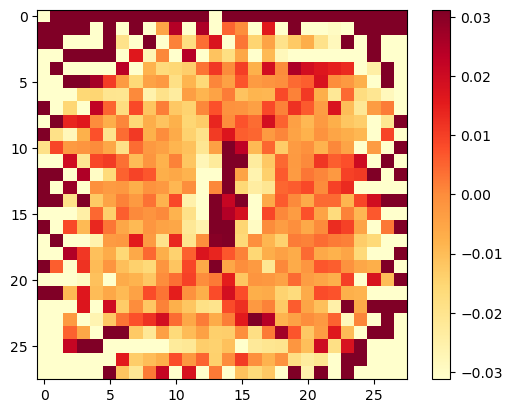

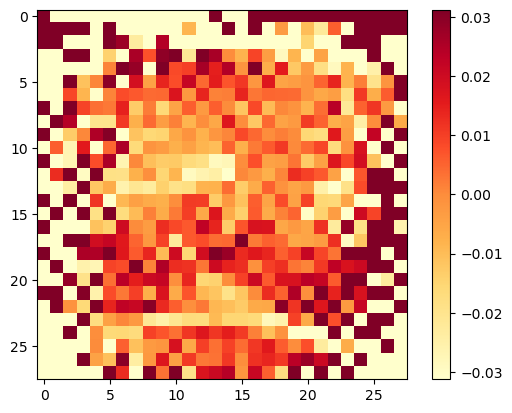

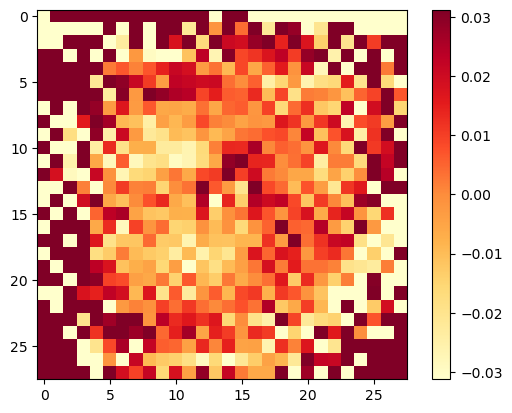

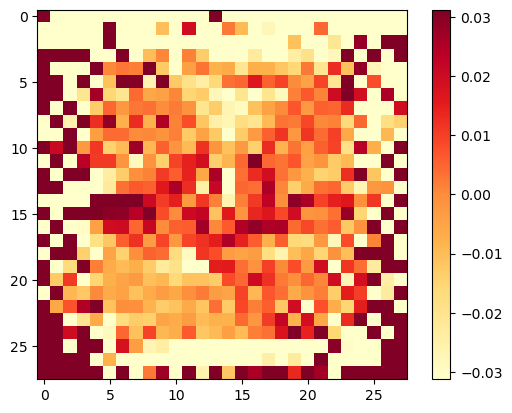

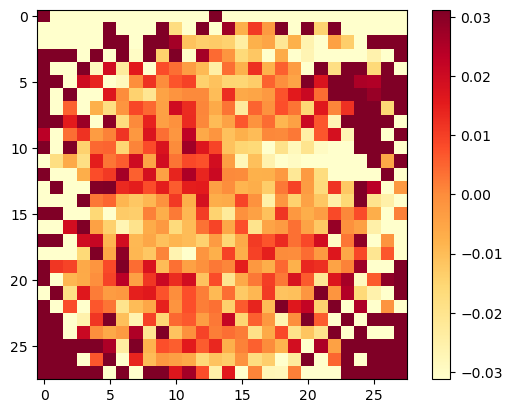

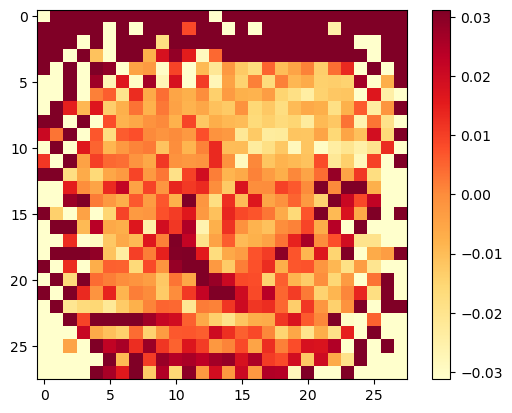

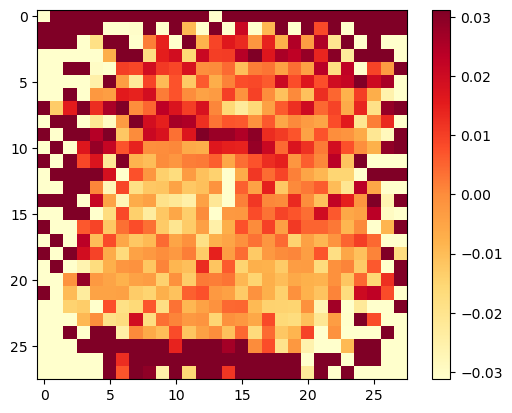

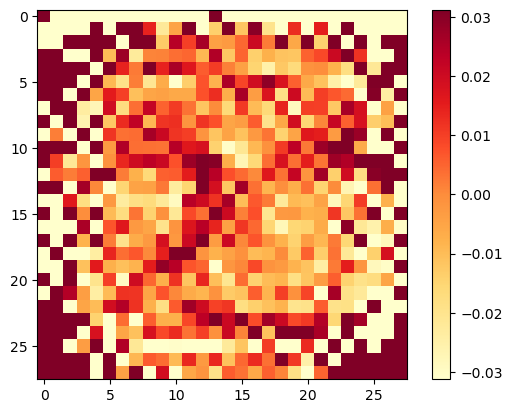

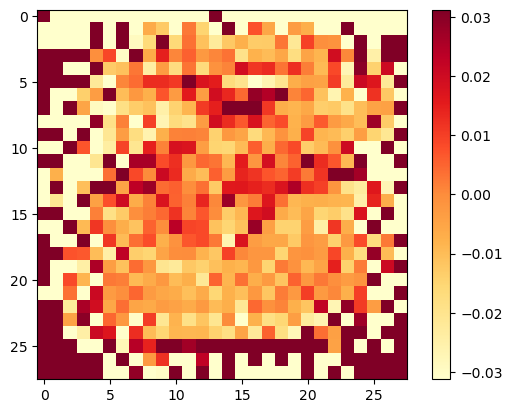

In [10]:
# Display the colored images of the different digit classifiers
detector_images = []

for detector in detectors.values():
    detector_images.append(detector.reshape((28, 28)))

for image in detector_images:
    plt.figure()
    plt.imshow(image, cmap='YlOrRd', vmin=-0.03125, vmax=0.03125)
    plt.colorbar()

This is a 4


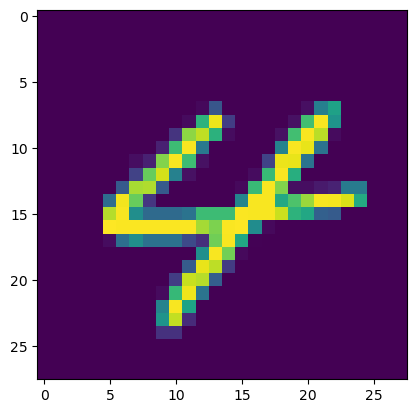

In [6]:
num_test_images = 10000

Xtest = normalize(mnist['x_test'][:num_test_images])
Ytest = mnist['y_test'][:num_test_images]

i = random.randrange(0, num_test_images, 1)

image = Xtest[i]

plt.imshow(image)

print("This is a " + str(determine_digit(image)))

In [7]:
guesses = []

for image in Xtest:
    guesses.append(determine_digit(image))

truths = np.array(guesses)

truths[truths != Ytest] = 0
truths[truths == Ytest] = 1

hits = np.sum(truths)
misses = np.sum(1-truths)

prediction_rate = hits/num_test_images
miss_rate = misses/num_test_images

print(prediction_rate)
print(miss_rate)


0.864
0.136
